In [1]:
# Import all the libraries
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
import os

Using TensorFlow backend.


In [2]:
#import images and clssify the number of classification

num_classes = 6
img_row, img_col = 48, 48
batch_size = 16
train_data_dir = './fer2013/train' 
test_data_dir = './fer2013/validation'

In [3]:
# let's use some data Augmentation

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 30,
                                  shear_range = 0.3,
                                  zoom_range = 0.3,
                                  width_shift_range =0.4,
                                  height_shift_range = 0.4,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                   color_mode = 'grayscale',
                                                   target_size = (img_row, img_col),
                                                   batch_size = batch_size,
                                                   class_mode = 'categorical',
                                                   shuffle = True)

validation_generator = validation_datagen.flow_from_directory(test_data_dir,
                                                             color_mode = 'grayscale',
                                                   target_size = (img_row, img_col),
                                                   batch_size = batch_size,
                                                   class_mode = 'categorical',

                                                              shuffle = True)

Found 28273 images belonging to 6 classes.
Found 3534 images belonging to 6 classes.


In [4]:
# Import keras and layers

from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.layers.core import Activation, Flatten, Dropout, Dense


# Keras Little VGG Model

In [5]:
# Create the VGG model

model = Sequential()

#Block - 1
model.add(Conv2D(32, (3,3), padding ='same', kernel_initializer = 'he_normal', input_shape = (img_row, img_col, 1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding ='same', kernel_initializer = 'he_normal', input_shape = (img_row, img_col, 1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

#Block - 2
model.add(Conv2D(64, (3,3), padding ='same', kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding ='same', kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

#Block - 3
model.add(Conv2D(128, (3,3), padding ='same', kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding ='same', kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

#Block - 4
model.add(Conv2D(256, (3,3), padding ='same', kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding ='same', kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

#Block - 5
model.add(Flatten())
model.add(Dense(64, kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#Block - 6
model.add(Dense(64, kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#Block - 7
model.add(Dense(num_classes, kernel_initializer = 'he_normal'))
model.add(Activation('softmax'))

print(model.summary())



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)       

# Train Our Model

In [6]:
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


In [7]:
checkpoint = ModelCheckpoint("/home/deeplearningcv/DeepLearningCV/Trained Models/emotion_little_vgg_3.h5",
                            monitor = 'val_loss', mode = 'min', save_best_only =True, verbose = 1) 

In [8]:
earlystop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3, verbose = 1, restore_best_weights = True)

In [9]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)


In [10]:
callbacks = [earlystop, checkpoint, reduce_lr]
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [11]:
nb_train_samples = 28273
nb_validation_samples = 3534
epochs = 1

In [12]:
model.fit_generator(train_generator, samples_per_epoch = nb_train_samples, nb_epoch = epochs, nb_val_samples = nb_validation_samples)

C:\Users\Sannidhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """Entry point for launching an IPython kernel.
C:\Users\Sannidhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=1767, epochs=1, validation_steps=3534)`
  """Entry point for launching an IPython kernel.


Epoch 1/1
1767/1767 [==============================] - 842s 477ms/step - loss: 1.9731 - accuracy: 0.2085


In [13]:
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
nb_train_samples = 28273
nb_validation_samples = 3534

validation_generator = validation_datagen.flow_from_directory(test_data_dir,
                                                             color_mode = 'grayscale',
                                                   target_size = (img_row, img_col),
                                                   batch_size = batch_size,
                                                   class_mode = 'categorical',
                                                   shuffle = True)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

Found 3534 images belonging to 6 classes.


In [15]:
y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size + 1)
y_pred = np.argmax(y_pred, axis = 1)

In [16]:
print("Confusion Matrix")
print(confusion_matrix(validation_generator.classes, y_pred))

Confusion Matrix
[[  0   0 486   4   1   0]
 [  0   0 520   5   3   0]
 [  0   0 868   8   3   0]
 [  0   0 620   4   2   0]
 [  0   0 582   8   3   1]
 [  0   0 415   0   1   0]]


In [17]:
print("Classificatio Report")
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names = target_names))

Classificatio Report
              precision    recall  f1-score   support

       Angry       0.00      0.00      0.00       491
        Fear       0.00      0.00      0.00       528
       Happy       0.25      0.99      0.40       879
     Neutral       0.14      0.01      0.01       626
         Sad       0.23      0.01      0.01       594
    Surprise       0.00      0.00      0.00       416

    accuracy                           0.25      3534
   macro avg       0.10      0.17      0.07      3534
weighted avg       0.13      0.25      0.10      3534



C:\Users\Sannidhi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


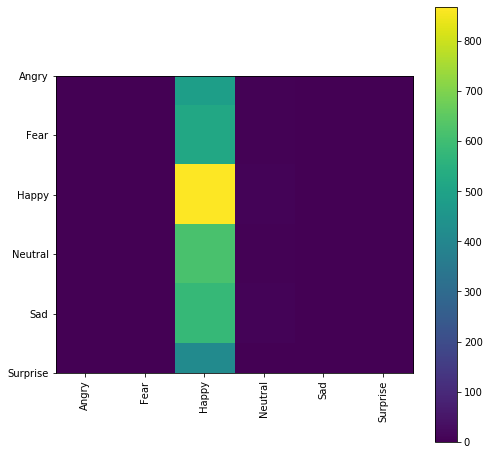

In [18]:
plt.figure(figsize = (8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)
plt.imshow(cnf_matrix, interpolation = 'nearest')
plt.colorbar()

tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [19]:
model.save("model.h5")
print("Model is save")

Model is save


In [20]:
# Get the class labels

validation_generator = validation_datagen.flow_from_directory(test_data_dir,
                                                             color_mode = 'grayscale',
                                                   target_size = (img_row, img_col),
                                                   batch_size = batch_size,
                                                   class_mode = 'categorical',
                                                   shuffle = True)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
print(class_labels)

Found 3534 images belonging to 6 classes.
{0: 'Angry', 1: 'Fear', 2: 'Happy', 3: 'Neutral', 4: 'Sad', 5: 'Surprise'}


# Test on Validation Images

In [21]:
from keras.models import load_model
from keras.optimizers import RMSprop, SGD, Adam
from keras.preprocessing import image
import numpy as np
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
import re

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 300 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height),grayscale=True), final_path, path_class

# dimensions of our images
img_width, img_height = 48, 48

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

files = []
predictions = []
true_labels = []

# predicting images
for i in range(0, 10):
    path = './fer2013/validation/' 
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size = 10)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    image = cv2.resize(image, None, fx=3, fy=3, interpolation = cv2.INTER_CUBIC)
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

C:\Users\Sannidhi\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [22]:
from keras.models import load_model
 
# load model
classifier = load_model('model.h5')
print("xxx")

xxx
